In [2]:
import scanpy as sc
import anndata as ad

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [7]:
DATA_PATH = '/projectnb/czproj/Algorithms/ycliu/Pan_proj/outputs/Ref314K/'

OUTPUT_PATH = '/projectnb/czlab/A00/ycliu/scRNA_integration_benchmark_datasets/Endometrium35K/'


# Load data

In [8]:
adata = sc.read_h5ad(DATA_PATH + 'Ref_4_samples_V1.h5ad')

In [9]:
adata

AnnData object with n_obs × n_vars = 34847 × 17736
    obs: 'n_genes', 'sample', 'library', 'Processing', 'Treatment', '10x kit', 'percent_mito', 'n_counts', 'scrublet_score', 'genotype', 'Library_genotype', 'Group', 'Endometriosis_stage', 'Hormonal treatment', 'Binary Stage', 'Stage', 'phase', 'dataset', 'Biopsy_type', 'Tissue_sampled', 'Age', 'Endometrial_pathology', 'celltype', 'lineage', 'label_long'
    var: 'gene_ids-0-Fonseca', 'feature_types-0-Fonseca', 'n_cells-0-Fonseca', 'gene_ids-1-Fonseca', 'feature_types-1-Fonseca', 'n_cells-1-Fonseca', 'gene_ids-2-Fonseca', 'feature_types-2-Fonseca', 'n_cells-2-Fonseca', 'gene_ids-3-Fonseca', 'feature_types-3-Fonseca', 'n_cells-3-Fonseca', 'gene_ids-4-Fonseca', 'feature_types-4-Fonseca', 'n_cells-4-Fonseca', 'gene_ids-5-Fonseca', 'feature_types-5-Fonseca', 'n_cells-5-Fonseca', 'gene_ids-6-Fonseca', 'feature_types-6-Fonseca', 'n_cells-6-Fonseca', 'MT-Fonseca', 'n_cells_by_counts-Fonseca', 'mean_counts-Fonseca', 'pct_dropout_by_counts-Fons

In [10]:
adata.obs['batch'] = adata.obs['sample'].copy()
adata.obs['batch'] = adata.obs['batch'].astype('category')
adata.obs['batch']

GSM6605439_AAACCCACAAGTGGGT-Huang    GSM6605439
GSM6605439_AAACCCACAGGGCTTC-Huang    GSM6605439
GSM6605439_AAACCCACATCGGAAG-Huang    GSM6605439
GSM6605439_AAACCCAGTAGTCTGT-Huang    GSM6605439
GSM6605439_AAACCCATCTCGTGAA-Huang    GSM6605439
                                        ...    
GSM4577308_TTTGTTGGTAGCTTAC-Wang     GSM4577308
GSM4577308_TTTGTTGGTCCATCTC-Wang     GSM4577308
GSM4577308_TTTGTTGGTGACTATC-Wang     GSM4577308
GSM4577308_TTTGTTGTCATTCTTG-Wang     GSM4577308
GSM4577308_TTTGTTGTCTTCTGGC-Wang     GSM4577308
Name: batch, Length: 34847, dtype: category
Categories (4, object): ['GSM4577308', 'GSM6605431', 'GSM6605434', 'GSM6605439']

In [11]:
adata.obs['labels'] = adata.obs['celltype'].copy()
adata.obs['labels']

GSM6605439_AAACCCACAAGTGGGT-Huang    SOX9_functionalis_II
GSM6605439_AAACCCACAGGGCTTC-Huang                eStromal
GSM6605439_AAACCCACATCGGAAG-Huang                  Venous
GSM6605439_AAACCCAGTAGTCTGT-Huang                eStromal
GSM6605439_AAACCCATCTCGTGAA-Huang            dStromal_mid
                                             ...         
GSM4577308_TTTGTTGGTAGCTTAC-Wang            dStromal_late
GSM4577308_TTTGTTGGTCCATCTC-Wang      Glandular_secretory
GSM4577308_TTTGTTGGTGACTATC-Wang             dStromal_mid
GSM4577308_TTTGTTGTCATTCTTG-Wang            dStromal_late
GSM4577308_TTTGTTGTCTTCTGGC-Wang      Glandular_secretory
Name: labels, Length: 34847, dtype: category
Categories (33, object): ['Arterial', 'Ciliated', 'Cycling', 'Fibroblast_basalis', ..., 'preGlandular', 'preLuminal', 'sHormones', 'uSMCs']

In [19]:
adata.var['gene_ids'] = adata.var.index
adata.var['gene_symbols'] = adata.var.index
adata.var['feature_types'] = 'Gene Expression'

adata.var[['gene_ids', 'gene_symbols', 'feature_types']]

,gene_ids,gene_symbols,feature_types
A1BG,A1BG,A1BG,Gene Expression
A2M,A2M,A2M,Gene Expression
A4GALT,A4GALT,A4GALT,Gene Expression
AAAS,AAAS,AAAS,Gene Expression
AACS,AACS,AACS,Gene Expression
...,...,...,...
ZXDC,ZXDC,ZXDC,Gene Expression
ZYG11A,ZYG11A,ZYG11A,Gene Expression
ZYG11B,ZYG11B,ZYG11B,Gene Expression
ZYX,ZYX,ZYX,Gene Expression


# Export dataset

In [20]:
adata

AnnData object with n_obs × n_vars = 34847 × 17736
    obs: 'n_genes', 'sample', 'library', 'Processing', 'Treatment', '10x kit', 'percent_mito', 'n_counts', 'scrublet_score', 'genotype', 'Library_genotype', 'Group', 'Endometriosis_stage', 'Hormonal treatment', 'Binary Stage', 'Stage', 'phase', 'dataset', 'Biopsy_type', 'Tissue_sampled', 'Age', 'Endometrial_pathology', 'celltype', 'lineage', 'label_long', 'batch', 'labels'
    var: 'gene_ids-0-Fonseca', 'feature_types-0-Fonseca', 'n_cells-0-Fonseca', 'gene_ids-1-Fonseca', 'feature_types-1-Fonseca', 'n_cells-1-Fonseca', 'gene_ids-2-Fonseca', 'feature_types-2-Fonseca', 'n_cells-2-Fonseca', 'gene_ids-3-Fonseca', 'feature_types-3-Fonseca', 'n_cells-3-Fonseca', 'gene_ids-4-Fonseca', 'feature_types-4-Fonseca', 'n_cells-4-Fonseca', 'gene_ids-5-Fonseca', 'feature_types-5-Fonseca', 'n_cells-5-Fonseca', 'gene_ids-6-Fonseca', 'feature_types-6-Fonseca', 'n_cells-6-Fonseca', 'MT-Fonseca', 'n_cells_by_counts-Fonseca', 'mean_counts-Fonseca', 'pct_dro

In [21]:

adata.obs = adata.obs[['batch', 'labels', 'sample', 'celltype', 'lineage', 'Treatment', 'phase', 
                       'library', 'Processing', 'genotype', 'Library_genotype', 'Group', 
                       'Endometriosis_stage', 'Hormonal treatment', 'Binary Stage', 'Stage', 'dataset', 
                       'Biopsy_type', 'Tissue_sampled', 'Age', 'Endometrial_pathology']]

In [22]:
adata.var = adata.var[['gene_ids', 'gene_symbols', 'feature_types']]

In [23]:
adata

AnnData object with n_obs × n_vars = 34847 × 17736
    obs: 'batch', 'labels', 'sample', 'celltype', 'lineage', 'Treatment', 'phase', 'library', 'Processing', 'genotype', 'Library_genotype', 'Group', 'Endometriosis_stage', 'Hormonal treatment', 'Binary Stage', 'Stage', 'dataset', 'Biopsy_type', 'Tissue_sampled', 'Age', 'Endometrial_pathology'
    var: 'gene_ids', 'gene_symbols', 'feature_types'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'

In [56]:
adata.var

,gene_ids,gene_symbols,feature_types
ENSG00000188976,ENSG00000188976,NOC2L,Gene Expression
ENSG00000187608,ENSG00000187608,ISG15,Gene Expression
ENSG00000149527,ENSG00000149527,PLCH2,Gene Expression
ENSG00000157881,ENSG00000157881,PANK4,Gene Expression
ENSG00000157873,ENSG00000157873,TNFRSF14,Gene Expression
...,...,...,...
ENSG00000183255,ENSG00000183255,PTTG1IP,Gene Expression
ENSG00000160255,ENSG00000160255,ITGB2,Gene Expression
ENSG00000160299,ENSG00000160299,PCNT,Gene Expression
ENSG00000160305,ENSG00000160305,DIP2A,Gene Expression


In [24]:
adata.obsm.clear()
adata

AnnData object with n_obs × n_vars = 34847 × 17736
    obs: 'batch', 'labels', 'sample', 'celltype', 'lineage', 'Treatment', 'phase', 'library', 'Processing', 'genotype', 'Library_genotype', 'Group', 'Endometriosis_stage', 'Hormonal treatment', 'Binary Stage', 'Stage', 'dataset', 'Biopsy_type', 'Tissue_sampled', 'Age', 'Endometrial_pathology'
    var: 'gene_ids', 'gene_symbols', 'feature_types'
    layers: 'counts'

In [25]:
adata.X

<34847x17736 sparse matrix of type '<class 'numpy.float32'>'
	with 110868440 stored elements in Compressed Sparse Row format>

## Save anndata

In [26]:
adata.write(OUTPUT_PATH+'endometrium35k.h5ad')

/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


## Save 10X data

In [27]:
import scipy.io
from scipy.sparse import csr_matrix
import numpy as np
import gzip

def save_10X_data(path, data, X_sparse=False):
    """
    args:   path, data. data included three numpy array valued components (counts_matrix, genes, cells).
    """
    counts_matrix, genes, cells = data # 
    
    # compress counts_matrix
    if X_sparse:
        counts_matrix = counts_matrix.T
    else:
        counts_matrix = csr_matrix(counts_matrix).T
    
    with gzip.open(path+'matrix.mtx.gz', 'wb') as f:
        scipy.io.mmwrite(f, counts_matrix)
        
    with gzip.open(path+'features.tsv.gz', 'wt') as f:
        np.savetxt(f, genes, delimiter='\t', fmt='%s')
        
    with gzip.open(path+'barcodes.tsv.gz', 'wt') as f:
        np.savetxt(f, cells, delimiter='\t', fmt='%s')

In [28]:
import numpy as np
counts_matrix = adata.X
genes = np.array(adata.var)
cells = np.array(adata.obs.index)
labels =  np.array(adata.obs['labels'])
batch = np.array(adata.obs['batch'])

In [29]:
data = counts_matrix, genes, cells
save_10X_data(OUTPUT_PATH, data, X_sparse=True)

In [30]:
np.savetxt(OUTPUT_PATH+'labels.csv', labels, delimiter='\t', fmt='%s')
np.savetxt(OUTPUT_PATH+'batch.csv', batch, delimiter='\t', fmt='%s')

## Check 10X data

In [31]:
adata_2 = sc.read_10x_mtx(OUTPUT_PATH)
adata_2

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 34847 × 17736
    var: 'gene_ids', 'feature_types'

In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv(OUTPUT_PATH+'batch.csv', sep='\t', header=None)

adata_2.obs['batch'] = np.array(df)[:,0]
adata_2.obs['batch'] = adata_2.obs['batch'].astype('category')


df = pd.read_csv(OUTPUT_PATH+'labels.csv', sep='\t', header=None)
df
adata_2.obs['labels'] = np.array(df)[:,0]
adata_2.obs['labels'] = adata_2.obs['labels'].astype('category')


In [33]:
adata_2.var

,gene_ids,feature_types
A1BG,A1BG,Gene Expression
A2M,A2M,Gene Expression
A4GALT,A4GALT,Gene Expression
AAAS,AAAS,Gene Expression
AACS,AACS,Gene Expression
...,...,...
ZXDC,ZXDC,Gene Expression
ZYG11A,ZYG11A,Gene Expression
ZYG11B,ZYG11B,Gene Expression
ZYX,ZYX,Gene Expression


In [34]:
adata_2.obs

,batch,labels
GSM6605439_AAACCCACAAGTGGGT-Huang,GSM6605439,SOX9_functionalis_II
GSM6605439_AAACCCACAGGGCTTC-Huang,GSM6605439,eStromal
GSM6605439_AAACCCACATCGGAAG-Huang,GSM6605439,Venous
GSM6605439_AAACCCAGTAGTCTGT-Huang,GSM6605439,eStromal
GSM6605439_AAACCCATCTCGTGAA-Huang,GSM6605439,dStromal_mid
...,...,...
GSM4577308_TTTGTTGGTAGCTTAC-Wang,GSM4577308,dStromal_late
GSM4577308_TTTGTTGGTCCATCTC-Wang,GSM4577308,Glandular_secretory
GSM4577308_TTTGTTGGTGACTATC-Wang,GSM4577308,dStromal_mid
GSM4577308_TTTGTTGTCATTCTTG-Wang,GSM4577308,dStromal_late


## Check anndata

In [35]:
adata = sc.read_h5ad(OUTPUT_PATH+ 'endometrium35k.h5ad')
adata

AnnData object with n_obs × n_vars = 34847 × 17736
    obs: 'batch', 'labels', 'sample', 'celltype', 'lineage', 'Treatment', 'phase', 'library', 'Processing', 'genotype', 'Library_genotype', 'Group', 'Endometriosis_stage', 'Hormonal treatment', 'Binary Stage', 'Stage', 'dataset', 'Biopsy_type', 'Tissue_sampled', 'Age', 'Endometrial_pathology'
    var: 'gene_ids', 'gene_symbols', 'feature_types'
    layers: 'counts'

In [36]:
adata.var

,gene_ids,gene_symbols,feature_types
A1BG,A1BG,A1BG,Gene Expression
A2M,A2M,A2M,Gene Expression
A4GALT,A4GALT,A4GALT,Gene Expression
AAAS,AAAS,AAAS,Gene Expression
AACS,AACS,AACS,Gene Expression
...,...,...,...
ZXDC,ZXDC,ZXDC,Gene Expression
ZYG11A,ZYG11A,ZYG11A,Gene Expression
ZYG11B,ZYG11B,ZYG11B,Gene Expression
ZYX,ZYX,ZYX,Gene Expression


In [37]:
adata.obs

,batch,labels,sample,celltype,lineage,Treatment,phase,library,Processing,genotype,...,Group,Endometriosis_stage,Hormonal treatment,Binary Stage,Stage,dataset,Biopsy_type,Tissue_sampled,Age,Endometrial_pathology
GSM6605439_AAACCCACAAGTGGGT-Huang,GSM6605439,SOX9_functionalis_II,GSM6605439,SOX9_functionalis_II,Epithelial,Collagenase,G1,GSM6605439,Fresh,GSM6605439,...,Ctrl_Superficial,0,nan,Proliferative,Proliferative Early,Huang,Superficial_Eutopic,eutopic_endometrium,33,C
GSM6605439_AAACCCACAGGGCTTC-Huang,GSM6605439,eStromal,GSM6605439,eStromal,Mesenchymal,Collagenase,G1,GSM6605439,Fresh,GSM6605439,...,Ctrl_Superficial,0,nan,Proliferative,Proliferative Early,Huang,Superficial_Eutopic,eutopic_endometrium,33,C
GSM6605439_AAACCCACATCGGAAG-Huang,GSM6605439,Venous,GSM6605439,Venous,Endothelial,Collagenase,G1,GSM6605439,Fresh,GSM6605439,...,Ctrl_Superficial,0,nan,Proliferative,Proliferative Early,Huang,Superficial_Eutopic,eutopic_endometrium,33,C
GSM6605439_AAACCCAGTAGTCTGT-Huang,GSM6605439,eStromal,GSM6605439,eStromal,Mesenchymal,Collagenase,G1,GSM6605439,Fresh,GSM6605439,...,Ctrl_Superficial,0,nan,Proliferative,Proliferative Early,Huang,Superficial_Eutopic,eutopic_endometrium,33,C
GSM6605439_AAACCCATCTCGTGAA-Huang,GSM6605439,dStromal_mid,GSM6605439,dStromal_mid,Mesenchymal,Collagenase,G1,GSM6605439,Fresh,GSM6605439,...,Ctrl_Superficial,0,nan,Proliferative,Proliferative Early,Huang,Superficial_Eutopic,eutopic_endometrium,33,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4577308_TTTGTTGGTAGCTTAC-Wang,GSM4577308,dStromal_late,GSM4577308,dStromal_late,Mesenchymal,Coll.+Trypsin,G1,GSM4577308,Fresh,SAMN15049049,...,Ctrl_Superficial,0,nan,Secretory,Secretory Mid,Wang,Superficial_Eutopic,eutopic_endometrium,18-34,C
GSM4577308_TTTGTTGGTCCATCTC-Wang,GSM4577308,Glandular_secretory,GSM4577308,Glandular_secretory,Epithelial,Coll.+Trypsin,G1,GSM4577308,Fresh,SAMN15049049,...,Ctrl_Superficial,0,nan,Secretory,Secretory Mid,Wang,Superficial_Eutopic,eutopic_endometrium,18-34,C
GSM4577308_TTTGTTGGTGACTATC-Wang,GSM4577308,dStromal_mid,GSM4577308,dStromal_mid,Mesenchymal,Coll.+Trypsin,G1,GSM4577308,Fresh,SAMN15049049,...,Ctrl_Superficial,0,nan,Secretory,Secretory Mid,Wang,Superficial_Eutopic,eutopic_endometrium,18-34,C
GSM4577308_TTTGTTGTCATTCTTG-Wang,GSM4577308,dStromal_late,GSM4577308,dStromal_late,Mesenchymal,Coll.+Trypsin,G1,GSM4577308,Fresh,SAMN15049049,...,Ctrl_Superficial,0,nan,Secretory,Secretory Mid,Wang,Superficial_Eutopic,eutopic_endometrium,18-34,C


# Preprocess

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


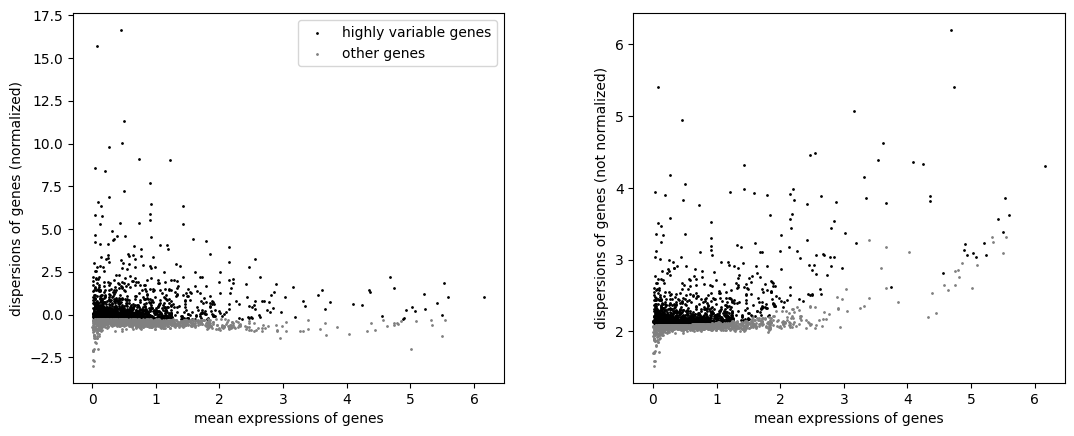

In [7]:
# sc.pp.filter_genes(adata, min_cells=3)

# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)

# endometrium35k is normalized and log-transformed dataset.

sc.pp.highly_variable_genes(adata, n_top_genes =2000, min_mean=0.0125, max_mean=9, min_disp=0.5)
sc.pl.highly_variable_genes(adata)


In [8]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


# Scanpy embeddings

In [9]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=50)
sc.tl.umap(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 50


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12040. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

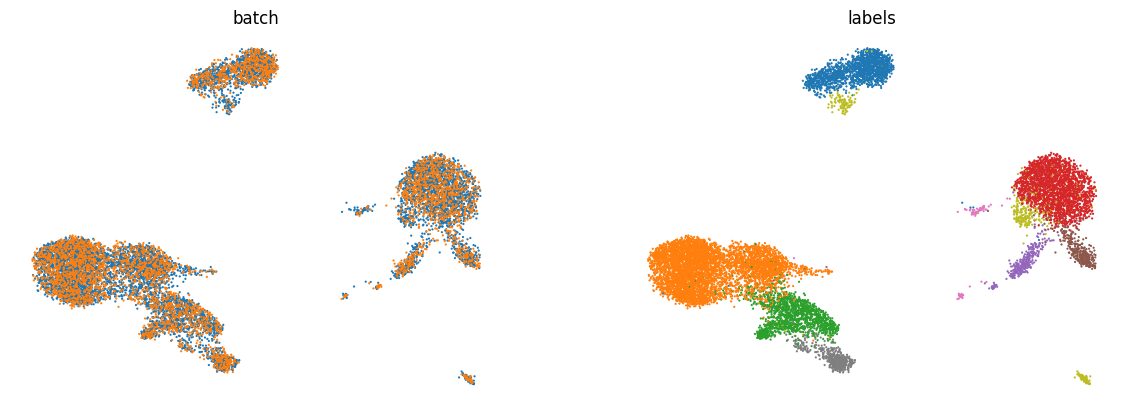

In [22]:
sc.pl.umap(adata, color=['batch', 'labels'], legend_loc=None, frameon=False)

# Harmony Integration

In [15]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


In [19]:
# Batch correction with Harmony
sc.external.pp.harmony_integrate(adata, 'batch')

2024-05-06 14:21:06,254 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-06 14:21:09,060 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-06 14:21:09,094 - harmonypy - INFO - Iteration 1 of 10
2024-05-06 14:21:10,999 - harmonypy - INFO - Iteration 2 of 10
2024-05-06 14:21:12,893 - harmonypy - INFO - Iteration 3 of 10
2024-05-06 14:21:14,199 - harmonypy - INFO - Iteration 4 of 10
2024-05-06 14:21:14,829 - harmonypy - INFO - Iteration 5 of 10
2024-05-06 14:21:15,464 - harmonypy - INFO - Iteration 6 of 10
2024-05-06 14:21:16,095 - harmonypy - INFO - Converged after 6 iterations


In [20]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony', n_neighbors=50, n_pcs=50)
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


In [41]:
sc.tl.leiden(adata, resolution=0.12)

running Leiden clustering
    finished: found 1 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

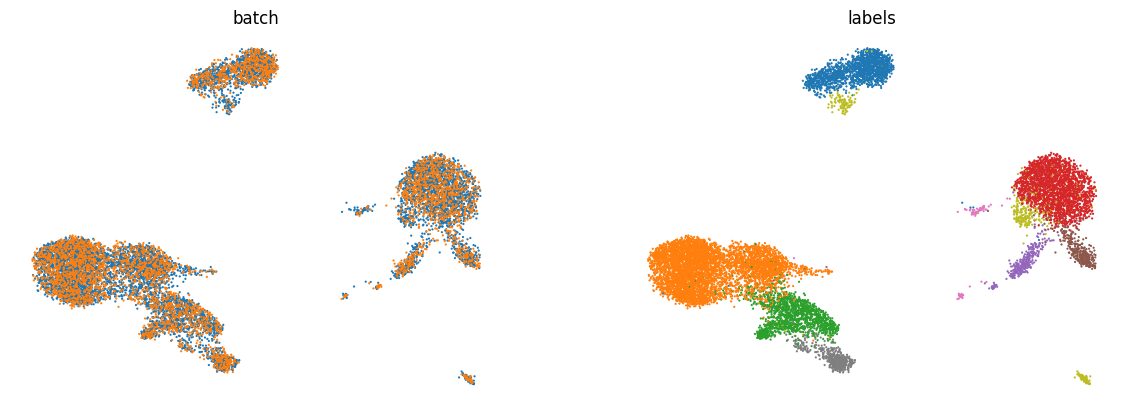

In [23]:
sc.pl.umap(adata, color=['batch', 'labels'], legend_loc=None, frameon=False)

In [47]:
import pandas as pd

# Creating a sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Suppose you want to swap columns 'A' and 'C'
df = df.rename(columns={'A': 'temp', 'C': 'A'})  # Temporarily rename 'A' to 'temp' and 'C' to 'A'
df = df.rename(columns={'temp': 'C'})  # Finally rename 'temp' to 'C'

# Print the modified DataFrame
print(df)


   C  B  A
0  1  4  7
1  2  5  8
2  3  6  9
